<a href="https://colab.research.google.com/github/RamcharanChandragiri/MACHINE-LEARNING/blob/main/ML_Lab_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**SUBTASK-01**

K-Nearest Neighbors -KNN: Implementing KNN for classification and regression;
analyzing effect of 'k'.

Kaggle Dataset Link: https://www.kaggle.com/competitions/titanic

Tasks:
1. Load train.csv and preprocess:
Handle missing values (Age)
Encode categorical features (Sex, Embarked)
2. Train K Neighbors Classifier with different k values:
k = 1, 3, 5, 7, 9
3. For each k, calculate:
Accuracy
Confusion Matrix
4. Plot k vs Accuracy
5. Identify best k and justify.


In [3]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Load dataset
df = pd.read_csv("train (1).csv")

# ----------------------------
# 1. Handle Missing Values
# ----------------------------

# Fill missing Age with median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill Embarked with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# ----------------------------
# 2. Encode Categorical Variables
# ----------------------------

# Encode Sex
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# One-hot encode Embarked
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

# ----------------------------
# 3. Feature Selection
# ----------------------------

features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
            'Embarked_Q', 'Embarked_S']

X = df[features]
y = df['Survived']

# ----------------------------
# 4. Train-Test Split
# ----------------------------

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ----------------------------
# 5. Feature Scaling (VERY IMPORTANT for KNN)
# ----------------------------

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


/tmp/ipython-input-1024920459.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-1024920459.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

In [4]:
#train the knn

k_values = [1, 3, 5, 7, 9]
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

    print(f"\nResults for k = {k}")
    print("Accuracy:", acc)
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))



Results for k = 1
Accuracy: 0.7653631284916201
Confusion Matrix:
[[82 23]
 [19 55]]

Results for k = 3
Accuracy: 0.7877094972067039
Confusion Matrix:
[[88 17]
 [21 53]]

Results for k = 5
Accuracy: 0.8044692737430168
Confusion Matrix:
[[90 15]
 [20 54]]

Results for k = 7
Accuracy: 0.8044692737430168
Confusion Matrix:
[[89 16]
 [19 55]]

Results for k = 9
Accuracy: 0.7932960893854749
Confusion Matrix:
[[91 14]
 [23 51]]


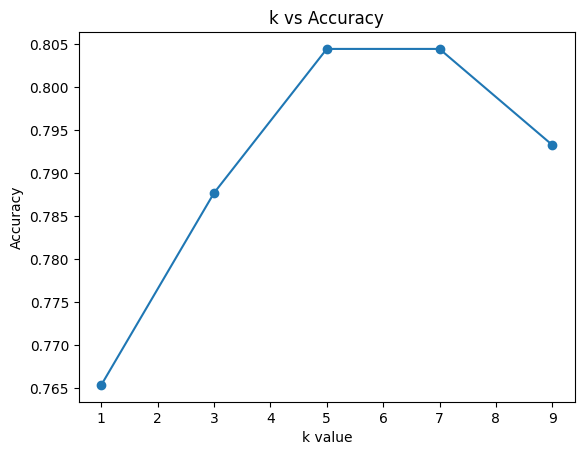

In [5]:
#plot K vs accuracy

plt.figure()
plt.plot(k_values, accuracies, marker='o')
plt.xlabel("k value")
plt.ylabel("Accuracy")
plt.title("k vs Accuracy")
plt.show()


**SUBTASK-02**

K-Nearest Neighbors -KNN: Implementing KNN for classification and regression;
analyzing effect of 'k'.

Kaggle Dataset Link: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-
data

Tasks:
1. Load dataset and encode target (M=1, B=0)
2. Apply StandardScaler
3. Train KNN model with k values:
k = 1 to 15
4. Report:
Best k (highest accuracy)
Classification report for best k
5. Compare performance with and without scaling


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
df = pd.read_csv("data.csv")

# Drop unnecessary columns
df = df.drop(columns=["id", "Unnamed: 32"])

# Encode target: M=1, B=0
df["diagnosis"] = df["diagnosis"].map({"M": 1, "B": 0})

X = df.drop("diagnosis", axis=1)
y = df["diagnosis"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [7]:
# apply standard sclaer
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#training the KNN model

k_values = range(1, 16)

accuracy_scaled = []
accuracy_unscaled = []

for k in k_values:

    # Without Scaling
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy_unscaled.append(accuracy_score(y_test, y_pred))

    # With Scaling
    knn_scaled = KNeighborsClassifier(n_neighbors=k)
    knn_scaled.fit(X_train_scaled, y_train)
    y_pred_scaled = knn_scaled.predict(X_test_scaled)
    accuracy_scaled.append(accuracy_score(y_test, y_pred_scaled))


In [8]:
#finding the best K

best_k = k_values[np.argmax(accuracy_scaled)]
best_accuracy = max(accuracy_scaled)

print("Best k:", best_k)
print("Best Accuracy (scaled):", best_accuracy)



best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train_scaled, y_train)

y_best = best_knn.predict(X_test_scaled)

print(classification_report(y_test, y_best))


Best k: 5
Best Accuracy (scaled): 0.956140350877193
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        72
           1       0.97      0.90      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



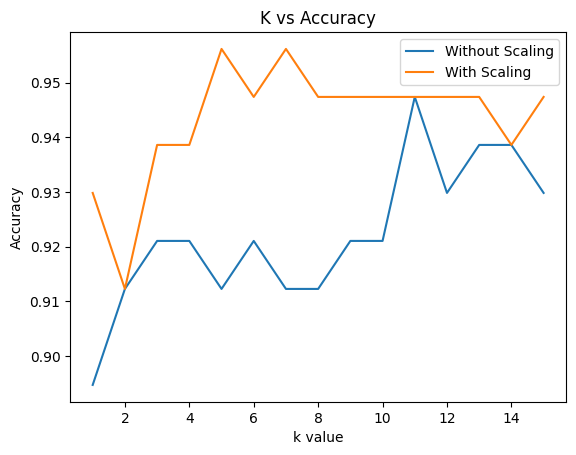

In [9]:
#plotting the graph

plt.figure()
plt.plot(k_values, accuracy_unscaled, label="Without Scaling")
plt.plot(k_values, accuracy_scaled, label="With Scaling")
plt.xlabel("k value")
plt.ylabel("Accuracy")
plt.title("K vs Accuracy")
plt.legend()
plt.show()


**SUBTASK-03**

K-Nearest Neighbors -KNN: Implementing KNN for classification and regression;
analyzing effect of 'k'.

Kaggle Dataset Link: https://www.kaggle.com/datasets/redwankarimsony/heart-
disease-data

Tasks:
1. Load dataset and preprocess (missing values, encoding if required)
2. Train KNN classifier for k values:
k = 3, 5, 7, 11, 15
3. Evaluate each k using:
Accuracy
Precision, Recall, F1-score
4. Plot k vs F1-score
5. Conclude effect of k on overfitting/underfitting.


In [18]:
import pandas as pd

df = pd.read_csv("heart_disease_uci.csv")

# Impute missing numerical values with the median BEFORE encoding categorical columns
numeric_cols = df.select_dtypes(include=['number']).columns
for col in numeric_cols:
    if df[col].isnull().any():
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)

# Encode categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Split
X = df.drop("num", axis=1)
y = df["num"]

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


/tmp/ipython-input-3615997628.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)


In [20]:
#training the KNN

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

k_values = [3, 5, 7, 11, 15]

results = []

#evaluating accuracy

for k in k_values:

    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train_scaled, y_train)

    y_pred = model.predict(X_test_scaled)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    results.append((k, acc, prec, rec, f1))

    print(f"\nResults for k = {k}")
    print("Accuracy :", acc)
    print("Precision:", prec)
    print("Recall   :", rec)
    print("F1-score :", f1)



Results for k = 3
Accuracy : 0.6086956521739131
Precision: 0.5493932935493038
Recall   : 0.6086956521739131
F1-score : 0.5705807124793191

Results for k = 5
Accuracy : 0.5760869565217391
Precision: 0.5323896722326759
Recall   : 0.5760869565217391
F1-score : 0.5502407594900266

Results for k = 7
Accuracy : 0.6086956521739131
Precision: 0.5594482457014428
Recall   : 0.6086956521739131
F1-score : 0.5769254165540876

Results for k = 11
Accuracy : 0.592391304347826
Precision: 0.5379455696181205
Recall   : 0.592391304347826
F1-score : 0.5603345317370292

Results for k = 15
Accuracy : 0.5869565217391305
Precision: 0.517916503786069
Recall   : 0.5869565217391305
F1-score : 0.5462386232812534


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [21]:
import numpy as np

f1_scores = [r[4] for r in results]

best_index = np.argmax(f1_scores)
best_k = k_values[best_index]

print("\nBest k based on F1-score:", best_k)



Best k based on F1-score: 7


In [22]:
from sklearn.metrics import classification_report

best_model = KNeighborsClassifier(n_neighbors=best_k)
best_model.fit(X_train_scaled, y_train)

y_best = best_model.predict(X_test_scaled)

print("\nClassification Report for best k =", best_k)
print(classification_report(y_test, y_best))



Classification Report for best k = 7
              precision    recall  f1-score   support

           0       0.77      0.84      0.80        82
           1       0.53      0.68      0.60        53
           2       0.29      0.18      0.22        22
           3       0.27      0.14      0.19        21
           4       0.00      0.00      0.00         6

    accuracy                           0.61       184
   macro avg       0.37      0.37      0.36       184
weighted avg       0.56      0.61      0.58       184



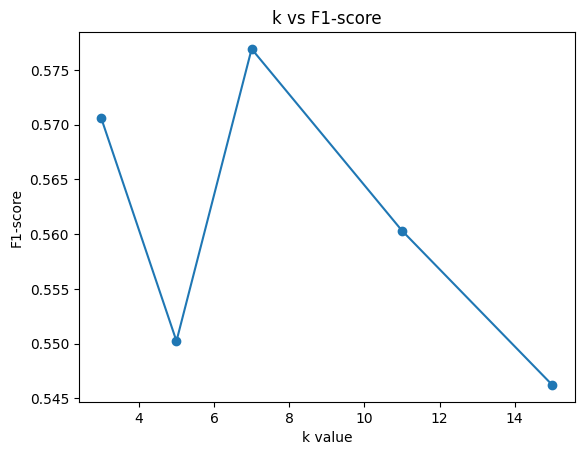

In [23]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(k_values, f1_scores, marker='o')
plt.xlabel("k value")
plt.ylabel("F1-score")
plt.title("k vs F1-score")
plt.show()


**SUBTASK-04**

K-Nearest Neighbors -KNN: Implementing KNN for classification and regression;
analyzing effect of 'k'.

Kaggle Dataset Link:
https://www.kaggle.com/datasets/mirichoi0218/insurance?utm_source=chatgpt.com

Tasks:
1. Load dataset and encode categorical columns (sex, smoker, region)
2. Apply StandardScaler
3. Train K Neighbors Regressor for k values:
k = 1, 3, 5, 7, 9, 11
4. Evaluate using:
MAE
MSE
RMSE
5. Plot k vs RMSE and select best k.

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load dataset
df = pd.read_csv("insurance.csv")

# Encode categorical columns
df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

# Split features & target
X = df.drop("charges", axis=1)
y = df["charges"]


In [25]:
#applying standard scaler
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [26]:

#training the K neighbours

k_values = [1, 3, 5, 7, 9, 11]

results = []

for k in k_values:

    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train_scaled, y_train)

    y_pred = model.predict(X_test_scaled)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    results.append((k, mae, mse, rmse))

    print(f"\nResults for k = {k}")
    print("MAE :", mae)
    print("MSE :", mse)
    print("RMSE:", rmse)



Results for k = 1
MAE : 3653.011713615672
MSE : 46894828.36136916
RMSE: 6847.979874486283

Results for k = 3
MAE : 3443.064162628109
MSE : 30743057.913611215
RMSE: 5544.642271022651

Results for k = 5
MAE : 3494.746057742537
MSE : 30459865.823198732
RMSE: 5519.045734834848

Results for k = 7
MAE : 3487.5281922084223
MSE : 30419977.167132385
RMSE: 5515.430823347564

Results for k = 9
MAE : 3470.612809896766
MSE : 31296361.313667413
RMSE: 5594.315088879729

Results for k = 11
MAE : 3522.5922178354813
MSE : 31686437.936072875
RMSE: 5629.070787978499


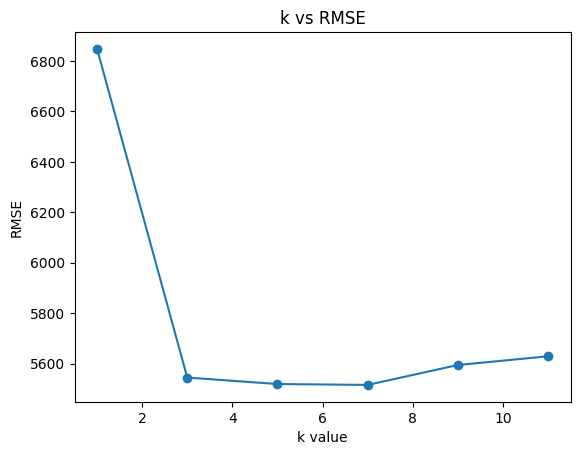

In [27]:
#plot


rmse_values = [r[3] for r in results]

plt.figure()
plt.plot(k_values, rmse_values, marker='o')
plt.xlabel("k value")
plt.ylabel("RMSE")
plt.title("k vs RMSE")
plt.show()


In [28]:
#find the best index

best_index = np.argmin(rmse_values)
best_k = k_values[best_index]

print("Best k based on lowest RMSE:", best_k)


Best k based on lowest RMSE: 7


**SUBTASK-05**

K-Nearest Neighbors -KNN: Implementing KNN for classification and regression;
analyzing effect of 'k'.

Kaggle Dataset Link:
https://www.kaggle.com/competitions/house-prices-advanced-regression-
techniques?utm_source=chatgpt.com

Tasks:
1. Load train.csv and select numeric features:
GrLivArea, OverallQual, TotalBsmtSF
Target: SalePrice
2. Handle missing values and apply StandardScaler.
3. Train KNN regression model for k values:
k = 1 to 20
4. Evaluate each k using:
RMSE and R² score
5. Plot k vs RMSE and conclude best k.


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_csv("housetrain.csv")

# Select required features
features = ["GrLivArea", "OverallQual", "TotalBsmtSF"]
target = "SalePrice"

df = df[features + [target]]


In [30]:
# Check missing values
print(df.isnull().sum())

# Fill missing values with median
df.fillna(df.median(), inplace=True)

# Split features and target
X = df[features]
y = df[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Apply scaling (IMPORTANT for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


GrLivArea      0
OverallQual    0
TotalBsmtSF    0
SalePrice      0
dtype: int64


In [31]:
#train the KNN for k=1 to 20

k_values = range(1, 21)

rmse_values = []
r2_values = []

for k in k_values:

    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train_scaled, y_train)

    y_pred = model.predict(X_test_scaled)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    rmse_values.append(rmse)
    r2_values.append(r2)

    print(f"\nResults for k = {k}")
    print("RMSE:", rmse)
    print("R²  :", r2)



Results for k = 1
RMSE: 39618.87280560852
R²  : 0.7953600616208195

Results for k = 2
RMSE: 37059.225990910505
R²  : 0.8209481325893926

Results for k = 3
RMSE: 34495.539785607885
R²  : 0.844864190523543

Results for k = 4
RMSE: 34890.464946181855
R²  : 0.8412916854800663

Results for k = 5
RMSE: 37006.152764502905
R²  : 0.8214606125686622

Results for k = 6
RMSE: 36978.23880896265
R²  : 0.8217298575735382

Results for k = 7
RMSE: 37190.4108680004
R²  : 0.8196782479427424

Results for k = 8
RMSE: 37016.20148091531
R²  : 0.8213636375996844

Results for k = 9
RMSE: 36302.11508477131
R²  : 0.828189372390296

Results for k = 10
RMSE: 36475.6713522957
R²  : 0.8265426313480612

Results for k = 11
RMSE: 36833.2232319744
R²  : 0.8231253408251088

Results for k = 12
RMSE: 36310.586921295675
R²  : 0.8281091720279683

Results for k = 13
RMSE: 36838.469417439366
R²  : 0.8230749524383939

Results for k = 14
RMSE: 37313.99419279304
R²  : 0.8184778424006047

Results for k = 15
RMSE: 37390.2284513330

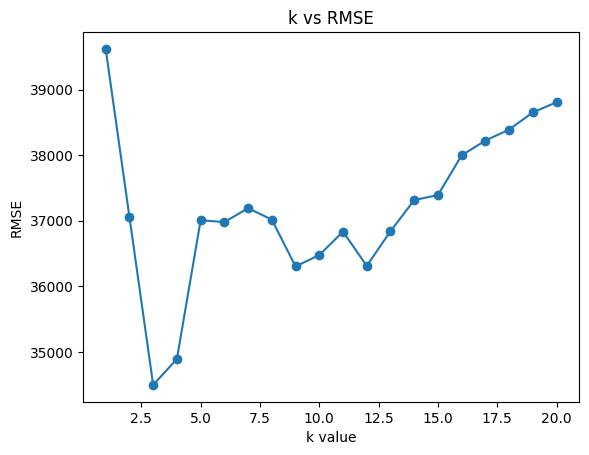

In [32]:
#plot k vs RMSE

plt.figure()
plt.plot(k_values, rmse_values, marker='o')
plt.xlabel("k value")
plt.ylabel("RMSE")
plt.title("k vs RMSE")
plt.show()


In [33]:
#identify best k
best_index = np.argmin(rmse_values)
best_k = list(k_values)[best_index]

print("Best k (lowest RMSE):", best_k)
print("Best RMSE:", rmse_values[best_index])
print("Corresponding R²:", r2_values[best_index])


Best k (lowest RMSE): 3
Best RMSE: 34495.539785607885
Corresponding R²: 0.844864190523543
